# Simple Linear Regression

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
#size of the training set 
observations = 1000

# generate them randomly, drawing from an uniform distribution -> np.random.uniform(low, high, size)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix (linear model y = x*w + b)
# column_stack ; combines two vectors into a matrix
inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [3]:
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))
# In this way, the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


### Initialize variables

In [4]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.01674448]
 [ 0.05421704]]
[-0.0516159]


### Set a learning rate

In [5]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

$$ L2 \ norm \ loss \ L = 1/2\Sigma|y_i-t_i|^2 $$

In [10]:
# high learning rate -> the loss to diverge to infinity, instead of converge to 0.
for i in range (1000):

    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets #differences between the outputs and the targets
    #L2 norm loss fucntion
    loss = np.sum(deltas ** 2) / 2 / observations        
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
print (weights, biases)

[[ 2.00283797]
 [-2.99966793]] [5.01611014]


### Print weights and biases and see if we have worked correctly.

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

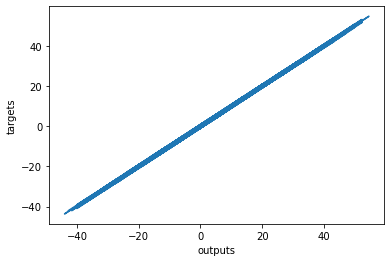

In [8]:
# print the outputs and the targets in order to see if they have a linear relationship.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()